# Introduction to Jupyter notebooks

You can use notebooks to write and run Python code. It is good for documenting workflows, especially for data science.

## What is a notebook?
It's a file that contains formatted text and code. You can alternate code blocks and text blocks and read them from top to bottom.

## Why would I use this?
### Document your process
- All of your code can live in one file, but steps can be broken up into separate code blocks (instead of one big pile of spaghetti code). 
- Since it supports formatted text (in Markdown), it is easy to describe the why's and not just the how's.
- Seeing the results of code inline means you don't have to pepper print statements to describe what step of results you're looking at.

### Sharing is caring
- You can send your notebook files to a fellow data enthusiasts.
- They can run your code and understand your methods, reproduce your results, or repurpose your code for their own analysis.

## Example analysis
We'll be looking at a CSV dataset of people who tip at restaurants. The source data can be found in `/data/tippers.csv`

1. Import the dataset

In [26]:
import pandas

tips = pandas.read_csv('tips.csv')

2. View the data

In [37]:
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


Number of rows and columns:

In [38]:
tips.shape

(244, 7)

Data type of each column

In [39]:
tips.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [40]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [41]:
import seaborn

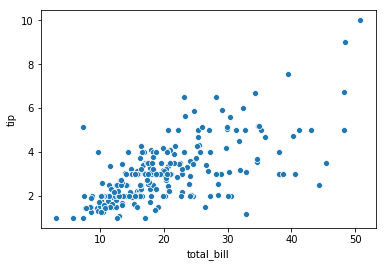

In [50]:
plot = seaborn.scatterplot(x='total_bill', y='tip', data=tips)

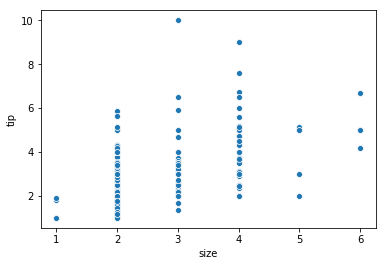

In [51]:
plot = seaborn.scatterplot(x='size', y='tip', data=tips)

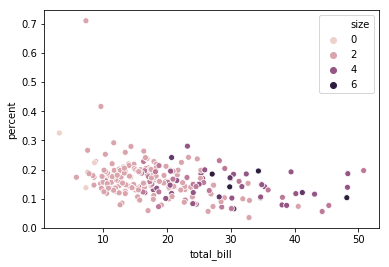

In [64]:
tips['bill_per_person'] = tips['total_bill'] / tips['size']
tips['percent'] = tips['tip'] / tips['total_bill']
plot = seaborn.scatterplot(x='total_bill', y='percent', hue='size', data=tips)

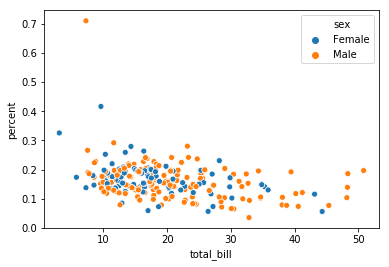

In [65]:
#sex, smoker, day, time
plot = seaborn.scatterplot(x='total_bill', y='percent', hue='sex', data=tips)

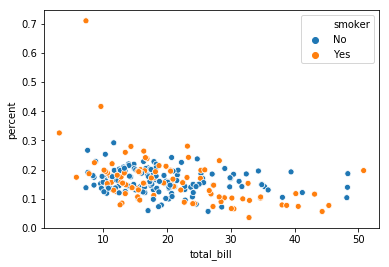

In [66]:
plot = seaborn.scatterplot(x='total_bill', y='percent', hue='smoker', data=tips)

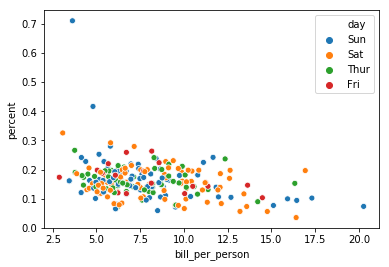

In [75]:
plot = seaborn.scatterplot(x='bill_per_person', y='percent', hue='day', data=tips)

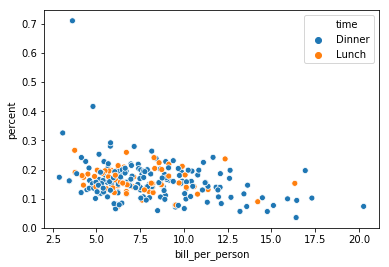

In [74]:
plot = seaborn.scatterplot(x='bill_per_person', y='percent', hue='time', data=tips)

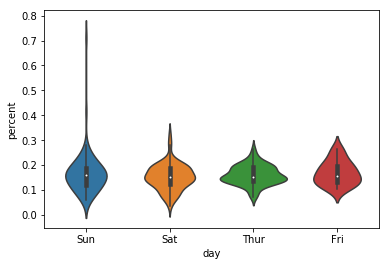

In [95]:
plot = seaborn.violinplot(x='day', y='percent', data=tips)

In [98]:
tips['day_time'] = tips['day'] + ' ' + tips['time']

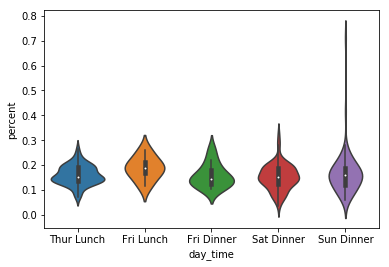

In [105]:
plot = seaborn.violinplot(x='day_time', y='percent', data=tips, order=['Thur Lunch', 'Fri Lunch', 'Fri Dinner', 'Sat Dinner', 'Sun Dinner'])

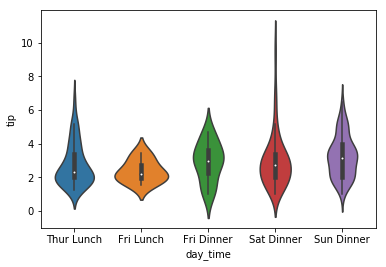

In [108]:
plot = seaborn.violinplot(x='day_time', y='tip', data=tips, order=['Thur Lunch', 'Fri Lunch', 'Fri Dinner', 'Sat Dinner', 'Sun Dinner'])